# Social Media and Network Analytics
Analysing and Tracking the Sentiment and Topics on Social Media Reddit and YouTube

"ANALYZING THE CHALLENGES ENCOUNTERED BY INTERNATIONAL STUDENTS VIA SOCIAL MEDIA ENGAGEMENT (YouTube)"

YouTube(data analysis)

### Importing all libraries required

In [1]:
%load_ext autoreload
%autoreload 1

In [1]:
import json
import sys
import string
from collections import Counter
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import codecs
import re
import math
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from colorama import Fore, Back, Style
import datetime
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from colorama import Fore, Back, Style
from datetime import datetime
from country_list import countries_for_language
import networkx as nx
from matplotlib.patches import ArrowStyle
import random
from TextProcessing import TextProcessing

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afrahhassan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/afrahhassan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/Users/afrahhassan/YouTube_last/youtube last/TextProcessing.py:25: DeprecationWarning: invalid escape sequence '\d'
  regexDigit = re.compile("^\d+\s|\s\d+\s|\s\d+$")


## DATA CLEANING

The cleaning process consists of removing emoticons, http links and such from the title, description and comment body.
It also involve changing the datetime format from "%Y-%m-%dT%H:%M:%SZ" to "%Y-%m-%d".

In [3]:
# to remove emoticons
def remove_emot(text):
    pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA70-\U0001FAFF"  
        u"\U0001F680-\U0001F6FF"
        "]+", re.UNICODE)
    return re.sub(pattern, '', text)

In [4]:

cleaned_post = []

with open("internationalStudentsyouTube.json", "r", encoding="utf-8") as f:
    posts = json.load(f)

    for post in posts:
        cleaned_title = re.sub(r'http\S+', '', remove_emot(post['title']))
        cleaned_description = re.sub(r'http\S+', '', remove_emot(post['description']))
        post['title'] = cleaned_title
        post['description'] = cleaned_description
        # Parse the datetime string
        dt = datetime.strptime(post['createdDate'], "%Y-%m-%dT%H:%M:%SZ")

        # Extract the date in YYYY-MM-DD format
        post['createdDate'] = dt.strftime("%Y-%m-%d")

        for comment in post['Comments']:
            cleaned_comment = re.sub(r'http\S+', '', remove_emot(comment['body']))
            comment['body'] = cleaned_comment
            # Parse the datetime string
            dt = datetime.strptime(comment['createdTime'], "%Y-%m-%dT%H:%M:%SZ")
            # Extract the date in YYYY-MM-DD format
            comment['createdTime'] = dt.strftime("%Y-%m-%d")
        cleaned_post.append(post)
        
# Save the cleaned data to a new JSON file
with open("cleaned_internationalStudentsyouTube.json", "w", encoding="utf-8") as t:
    json.dump(cleaned_post, t, ensure_ascii=False, indent=4)

## DATA PREPROCESSING

Data preprocessing step involves converting text into lower case, tokenizing the text, removing whitespaces and also stemming for the tokens

In [5]:
def processText(text, tokenizer, stemmer, stopwords):
 
    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [stemmer.stem(token.lower()) for token in lTokens if token.isalpha() and token.lower() not in stopwords]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

In [6]:
import json
import string
import nltk
from collections import Counter

# Load the JSON data from the file
fJsonName = 'cleaned_internationalStudentsyouTube.json'

with open(fJsonName, 'r', encoding='utf-8') as f:
    posts = json.load(f)

# Define the tokenizer, stopwords, and stemmer
tweetTokeniser = nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']
tweetStemmer = nltk.stem.PorterStemmer()

# Create a Counter to store term frequency
termFreqCounter = Counter()

for post in posts:
    postTitle = post['title']
    # Tokenize, filter stopwords, and convert to lowercase
    lTokens = processText(text=postTitle, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)
    
    # Update the term frequency counter with the tokens
    termFreqCounter.update(lTokens)

print("*************TERM FREQUENCY****************")
freqNum = 100 # Change this to control how many top terms to display
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))


*************TERM FREQUENCY****************
student: 128
studi: 51
intern: 43
abroad: 43
visa: 30
exchang: 24
accommod: 24
australia: 23
foreign: 17
educ: 14
canada: 11
uk: 11
oversea: 11
life: 10
program: 10
univ: 9
day: 9
us: 9
school: 8
high: 8
best: 7
exploit: 6
chang: 6
know: 6
new: 6
find: 5
updat: 5
germani: 5
guid: 5
wish: 5
usa: 5
consult: 5
appli: 5
thing: 5
import: 5
tour: 5
london: 5
news: 4
cap: 4
system: 4
cost: 4
knew: 4
hou: 4
come: 4
australian: 4
need: 4
countri: 4
full: 4
get: 4
mba: 4
reason: 4
move: 4
go: 4
would: 3
fee: 3
home: 3
money: 3
applic: 3
consid: 3
rule: 3
crisi: 3
make: 3
india: 3
interview: 3
refu: 3
immigr: 3
take: 3
current: 3
question: 3
vlog: 3
becom: 3
year: 3
tell: 3
japan: 3
tip: 3
kc: 3
job: 2
struggl: 2
advic: 2
disastr: 2
juli: 2
nutshel: 2
everyth: 2
rise: 2
number: 2
worth: 2
limit: 2
big: 2
situat: 2
help: 2
cow: 2
cash: 2
recruit: 2
promi: 2
fal: 2
franc: 2
africa: 2
realiti: 2
free: 2
south: 2


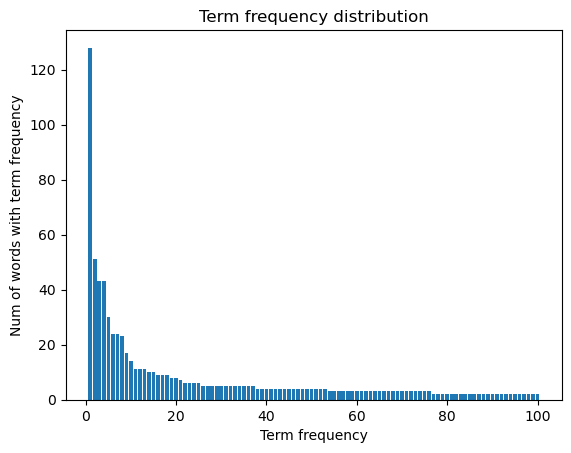

In [7]:
y = [count for tag, count in termFreqCounter.most_common(freqNum)]
x = range(1, len(y) + 1)

# use matplotlib bar chat to plot this
plt.bar(x, y)
plt.title("Term frequency distribution")
plt.ylabel('Num of words with term frequency')
plt.xlabel('Term frequency')
plt.show()

## SENTIMENT ANALYSIS

### Sentiment Analysis using Count Method

In [8]:
def computeSentiment(lTokens, setPosWords, setNegWords):

    # counting the number of positive words (hint: use setPosWords)
    poswordCount = 0
    for word in lTokens:
        if word in setPosWords:
            poswordCount += 1
    
    # counting the number of negative words (hint: use setNegWords)
    negwordCount = 0
    for word in lTokens:
        if word in setNegWords:
            negwordCount += 1
            
    # computing the sentiment 
    numberPosWords = poswordCount
    numberNegWords = negwordCount
    sentimentValue = numberPosWords - numberNegWords
    
    # computing the sentiment value
    sentiment = sentimentValue
    
    return sentiment


In [9]:
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    for token in lTokens:
        if token in setPosWords:
            print(Fore.RED + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.BLUE + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

In [10]:
def countWordSentimentAnalysis(setPosWords, setNegWords, sTweetsFilename, bPrint, textProcessor):

    lSentiment = []
    # open file and process YouTube posts and comments, one by one
    with open('cleaned_internationalStudentsyouTube.json', 'r', encoding="utf-8") as f:
        posts = json.load(f)
        
    for post in posts:
            postText = post['title'] + post['description']
            postDate = post['createdDate']

            
            # pre-process the YouTube post text
            lTokens = textProcessor.process(postText)
            lTokens = [token for token in lTokens if token.encode('utf-8').isalpha()]
            
            # computing sentiment 
            sentiment = computeSentiment(lTokens, setPosWords, setNegWords)
                
            # save the date and sentiment of each YouTube post (used for time series)
            lSentiment.append([(postDate), sentiment])

            # red is printed for positive and blue color for negative words
            if bPrint:
                printColouredTokens(lTokens, setPosWords, setNegWords, sentiment)
                
            # processing the comments
            for comment in post['Comments']:
                postText = comment['body']
                postDate = comment['createdTime']
                
                # pre-process the tweet text
                lTokens = textProcessor.process(postText)
                lTokens = [token for token in lTokens if token.encode('utf-8').isalpha()]
            
                # computing sentiment 
                sentiment = computeSentiment(lTokens, setPosWords, setNegWords)
                
                # save the date and sentiment of each tweet
                lSentiment.append([(postDate), sentiment])

               
                if bPrint:
                    printColouredTokens(lTokens, setPosWords, setNegWords, sentiment)


    return lSentiment


### Sentiment Analysis using Vader approach

In [11]:
def vaderPrintTokens(lTokens, dSentimentScores):

    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [12]:
def vaderSentimentAnalysis(jsonFile, bPrint, tweetProcessor):

    # this is the vader sentiment analyser, part of nltk
    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    # open file and process tweets, one by one
    with open(jsonFile, 'r', encoding="utf-8") as f:
        posts = json.load(f)
        
    for post in posts:
            postText = post['title'] + post['description']
            postDate = post['createdDate']
            
            # pre-process the post text
            lTokens = textProcessor.process(postText)

            # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
            # see workshop sheet for what dSentimentScores holds
            dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

            # save the date and sentiment of each post (used for time series)
           
            
            compound = dSentimentScores['compound']
            positive = dSentimentScores['pos']
            negative = dSentimentScores['neg']
            neutral = dSentimentScores['neu']
            lSentiment.append([(postDate), compound, positive, negative, neutral,lTokens])


            # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
            # of positive and negative words, we cannot use colorama to label each token
            if bPrint:
                vaderPrintTokens(lTokens, dSentimentScores)
                
                
            # process the comments
            for comment in post['Comments']:
                postText = comment['body']
                postDate = comment['createdTime']
                
                # pre-process the post text
                lTokens = textProcessor.process(postText)

                # this computes the sentiment scores (called polarity score in nltk, but mean same thing essentially)
                # see workshop sheet for what dSentimentScores holds
                dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))

                # save the date and sentiment of each post 
                compound = dSentimentScores['compound']
                positive = dSentimentScores['pos']
                negative = dSentimentScores['neg']
                neutral = dSentimentScores['neu']
                lSentiment.append([(postDate), compound, positive, negative, neutral,lTokens])


                # if we are printing, we print the tokens then the sentiment scores.  Because we don't have the list
                # of positive and negative words, we cannot use colorama to label each token
                if bPrint:
                    vaderPrintTokens(lTokens, dSentimentScores)
                    
                    
    return lSentiment

### Positive words and negative words text file used to compare and positive and negative words

In [13]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# input file of set of YouTube posts (json format)
jsonFile = 'cleaned_internationalStudentsyouTube.json'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True


In [14]:
# construct the YouTube pro-processing object
# use tweet tokenizer
tweetTokenizer =  nltk.tokenize.TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords =  nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']

# call the TextProcessing python script
textProcessor = TextProcessing(tweetTokenizer, lStopwords)


# load set of positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)


# load set of negative words
lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [15]:
pos_count=[]
neg_count=[]
neu_count=[]
print("********************************Count Approach****************************************")
lSentiment_count= countWordSentimentAnalysis(setPosWords, setNegWords, jsonFile, flagPrint, textProcessor)

# Count of positive,negative and neutral sentiments
for sent_count in lSentiment_count:
    score=sent_count[1]
    if score >1:
        pos_count.append(1)
    elif score<1:
        neg_count.append(1)
    else:
        neu_count.append(1)
    

********************************Count Approach****************************************
international, students, rallying, working, hours, cap, news, australiainternational, students, rallying, federal, decision, restrict, working, hours, subscribe, get, breaking, news, follow, australia, facebook, twitter, instagram, join, latest, news, events, affect, local, city, well, news, across, australia, world, : -1
international, students, struggle, find, jobs, respective, fields, canadafor, many, international, students, coming, canada, study, permit, often, seen, ideal, pathway, land, jobs, get, permanent, residency, shaurya, kshatri, explains, many, come, struggle, find, job, fields, studied, connect, cbc, vancouver, online, website, tiktok, instagram, facebook, twitter, : -1
mean, hiring, manager, hire, : 0
maybe, meet, job, interviews, learn, speak, english, first, sorry, marinderpreet, understand, saying, live, canada, everyone, speak, hindu, : -1
international, students, study, fight, s

### Calling the Vader approach and calculating positive, negative and neutral sentiments .

In [16]:
pos_val=[]
neg_val=[]
neu_val=[]
min_comp=0.0

print("********************************Vader Approach*****************************************")
lSentiment_vader= vaderSentimentAnalysis(jsonFile, flagPrint, textProcessor)


# Count of positive,negative and neutral sentiments
for sent in lSentiment_vader:
    comp=sent[1]
    if comp > 0.0:
        pos_val.append(1)
    elif comp < 0.0:
        neg_val.append(1)
    elif comp == 0.0:
        neu_val.append(1)

#Identifying the highest negative sentiment
for i in lSentiment_vader:
    comp1=i[1]
    if comp1<min_comp:
        min_comp=comp1
    else:
        min_comp
for s in lSentiment_vader:
    if s[1]== min_comp:
        print(s)

********************************Vader Approach*****************************************
international, students, rallying, working, hours, cap, 9, news, australiainternational, students, rallying, federal, government's, decision, restrict, working, hours, subscribe, get, breaking, news, 9news.com.au, follow, 9news, australia, ►, facebook, ►, twitter, ►, instagram, join, 9news, latest, news, events, affect, local, city, well, news, across, australia, world, #9news, #breakingnews, #ninenewsaustralia, #9newsaus
neg: 0.054, neu: 0.856, pos: 0.09, compound: 0.1779, 
international, students, struggle, find, jobs, respective, fields, canadafor, many, international, students, coming, canada, study, permit, often, seen, ideal, pathway, land, jobs, get, permanent, residency, shaurya, kshatri, explains, many, come, struggle, find, job, fields, studied, connect, cbc, vancouver, online, website, tiktok, instagram, facebook, twitter, #cbcvancouver, #students, #internationalstudents, #immigration, #b

In [17]:
pos_val=[]
neg_val=[]
neu_val=[]
min_comp=0.0
approach = 'vader'

print("********************************Vader Approach*****************************************")
lSentiment_vader= vaderSentimentAnalysis(jsonFile, flagPrint, textProcessor)


# Count of positive,negative and neutral sentiments
for sent in lSentiment_vader:
    comp=sent[1]
    if comp > 0.0:
        pos_val.append(1)
    elif comp < 0.0:
        neg_val.append(1)
    elif comp == 0.0:
        neu_val.append(1)

#Identifying the highest negative sentiment
for i in lSentiment_vader:
    comp1=i[1]
    if comp1<min_comp:
        min_comp=comp1
    else:
        min_comp
for s in lSentiment_vader:
    if s[1]== min_comp:
        print(s)

********************************Vader Approach*****************************************
international, students, rallying, working, hours, cap, 9, news, australiainternational, students, rallying, federal, government's, decision, restrict, working, hours, subscribe, get, breaking, news, 9news.com.au, follow, 9news, australia, ►, facebook, ►, twitter, ►, instagram, join, 9news, latest, news, events, affect, local, city, well, news, across, australia, world, #9news, #breakingnews, #ninenewsaustralia, #9newsaus
neg: 0.054, neu: 0.856, pos: 0.09, compound: 0.1779, 
international, students, struggle, find, jobs, respective, fields, canadafor, many, international, students, coming, canada, study, permit, often, seen, ideal, pathway, land, jobs, get, permanent, residency, shaurya, kshatri, explains, many, come, struggle, find, job, fields, studied, connect, cbc, vancouver, online, website, tiktok, instagram, facebook, twitter, #cbcvancouver, #students, #internationalstudents, #immigration, #b

In [18]:
# Generating a dictionary for word count approach and vader approach

word_dict={'positive':len(pos_count),'negative':len(neg_count),'neutral':len(neu_count)}
print("-----------Word_count_approach-----------------")
print(word_dict)
print(" ")

vader_dict ={'positive':len(pos_val),'negative':len(neg_val),'neutral':len(neu_val)}
print("-----------Vader approach----------------------")
print(vader_dict)

-----------Word_count_approach-----------------
{'positive': 290, 'negative': 981, 'neutral': 299}
 
-----------Vader approach----------------------
{'positive': 801, 'negative': 254, 'neutral': 515}


In [19]:
# lSentiment_vader contains a list of lists with sentiment data
# Each sublist contains [postDate, compound, positive, negative, neutral, lTokens]

# Sort the list by the 'positive' score in descending order
pos_sentiment = sorted(lSentiment_vader, key=lambda x: x[2], reverse=True)
neg_sentiment = sorted(lSentiment_vader, key=lambda x: x[3], reverse=True)

# Get the top 10 positive sentiment scores

sentiment_posts = []



for pos in pos_sentiment:
    postDate, compound, positive, negative, neutral, lTokens = pos
    sentiment_posts.append({
        'Date': postDate,
        'Positive Score': positive,
        'Tokens': lTokens  
    })
for neg in neg_sentiment:
    postDate, compound, positive, negative, neutral, lTokens = neg
    sentiment_posts.append({
        'Date': postDate,
        'Negative Score': negative,
        'Tokens': lTokens  
    })

In [20]:
# lSentiment_vader contains a list of lists with sentiment data
# Each sublist contains [postDate, compound, positive, negative, neutral, lTokens]

# Sort the list by the 'positive' score in descending order
pos_sentiment = sorted(lSentiment_vader, key=lambda x: x[2], reverse=True)
neg_sentiment = sorted(lSentiment_vader, key=lambda x: x[3], reverse=True)

# Get the top 10 positive sentiment scores

sentiment_posts = []



for pos in pos_sentiment:
    postDate, compound, positive, negative, neutral, lTokens = pos
    sentiment_posts.append({
        'Date': postDate,
        'Positive Score': positive,
        'Tokens': lTokens  
    })
for neg in neg_sentiment:
    postDate, compound, positive, negative, neutral, lTokens = neg
    sentiment_posts.append({
        'Date': postDate,
        'Negative Score': negative,
        'Tokens': lTokens  
    })

In [21]:
from country_list import countries_for_language

country_list = countries_for_language('en')
extracted_countries = {}  # Create a dictionary to store country information
country_names = {country[1].lower() for country in country_list}

for post in sentiment_posts:
    tokens = post.get('Tokens', [])  # Get the 'Tokens' value from the dictionary or an empty list if it doesn't exist
    pos = post.get('Positive Score', 0)  # Initialize to 0 if not present
    neg = post.get('Negative Score', 0)  # Initialize to 0 if not present
    
    for token in tokens:
        if token in country_names:
            if token in extracted_countries:
                # If the country token already exists, update the positive and negative scores
                extracted_countries[token]['Positive score'] += pos
                extracted_countries[token]['Negative score'] += neg
            else:
                # If the country token is not in extracted_countries, create a new entry
                extracted_countries[token] = {'Positive score': pos, 'Negative score': neg}

print(extracted_countries)
                

{'bangladesh': {'Positive score': 2.7079999999999997, 'Negative score': 0.0}, 'india': {'Positive score': 17.589999999999982, 'Negative score': 5.613000000000003}, 'pakistan': {'Positive score': 1.621, 'Negative score': 0.252}, 'australia': {'Positive score': 39.148999999999866, 'Negative score': 11.21599999999998}, 'italy': {'Positive score': 5.451, 'Negative score': 1.3820000000000003}, 'japan': {'Positive score': 8.673000000000002, 'Negative score': 1.0719999999999998}, 'switzerland': {'Positive score': 1.9409999999999998, 'Negative score': 0.45399999999999996}, 'jamaica': {'Positive score': 0.6930000000000001, 'Negative score': 0.0}, 'nigeria': {'Positive score': 1.204, 'Negative score': 0.0}, 'canada': {'Positive score': 25.205000000000013, 'Negative score': 10.617999999999983}, 'thailand': {'Positive score': 0.504, 'Negative score': 0.0}, 'nicaragua': {'Positive score': 0.9390000000000001, 'Negative score': 0.472}, 'fiji': {'Positive score': 0.492, 'Negative score': 0.0}, 'malays

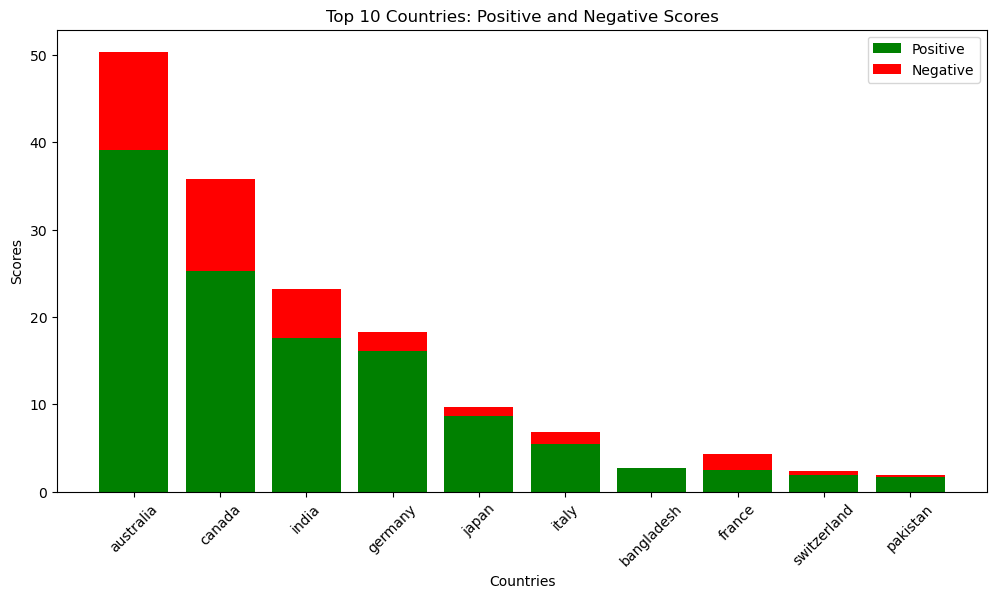

In [22]:

# Sort the countries by positive scores in descending order and take the top 10
top_10_countries = sorted(extracted_countries.keys(), key=lambda x: extracted_countries[x]['Positive score'], reverse=True)[:10]

# Extract the top 10 countries and their scores
top_10_positive_scores = [extracted_countries[country]['Positive score'] for country in top_10_countries]
top_10_negative_scores = [extracted_countries[country]['Negative score'] for country in top_10_countries]


plt.figure(figsize=(12, 6))

plt.bar(top_10_countries, top_10_positive_scores, label='Positive', color='g')
plt.bar(top_10_countries, top_10_negative_scores, bottom=top_10_positive_scores, label='Negative', color='r')

plt.xlabel('Countries')
plt.ylabel('Scores')
plt.title('Top 10 Countries: Positive and Negative Scores')
plt.legend()

plt.xticks(rotation=45) 

plt.show()


<Figure size 10000x5500 with 0 Axes>

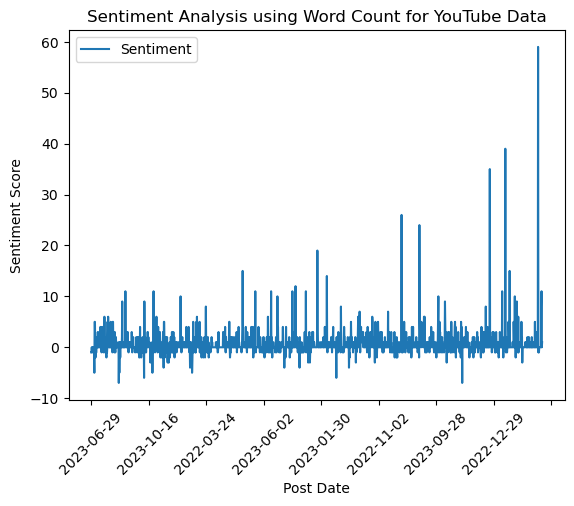

In [23]:
## Word count approach across time period

plt.figure(figsize=(100, 55)) 
series = pd.DataFrame(lSentiment_count, columns=['Date', 'Sentiment'])
series.set_index('Date', inplace=True)
series[['Sentiment']] = series[['Sentiment']].apply(pd.to_numeric)
series.plot()
plt.xlabel("Post Date")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis using Word Count for YouTube Data")
plt.xticks(rotation=45)
plt.show()

<Figure size 10000x5500 with 0 Axes>

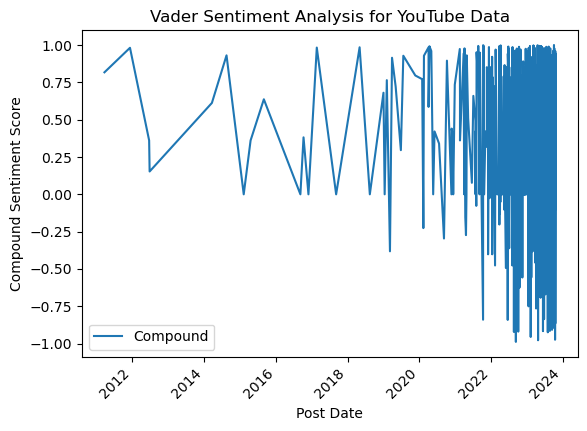

In [24]:
## Word count approach across time period


lSentiment_vader_filtered = [[sentiment[0], sentiment[1]] for sentiment in lSentiment_vader]

plt.figure(figsize=(100, 55))
series = pd.DataFrame(lSentiment_vader_filtered, columns=['Date', 'Compound'])
series['Date'] = pd.to_datetime(series['Date'])
series.set_index('Date', inplace=True)
series[['Compound']] = series[['Compound']].apply(pd.to_numeric)
series.plot()
plt.xlabel("Post Date")
plt.ylabel("Compound Sentiment Score")
plt.title("Vader Sentiment Analysis for YouTube Data")
plt.xticks(rotation=45)
plt.show()


# TOPIC ANALYSIS

In [25]:
# number of topics to discover (default = 10)
topicNum = 10
# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 15
# this is the number of features/words to used to describe our documents
featureNum = 1500

In [26]:
with open('cleaned_internationalStudentsyouTube.json', 'r', encoding='utf-8') as f:
    cleaned_posts = json.load(f)

nt = [post['title'] for post in cleaned_posts]

# Count Vectorizer
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(nt)
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names_out()
# LDA MODEL
# Run LDA
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

D:\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


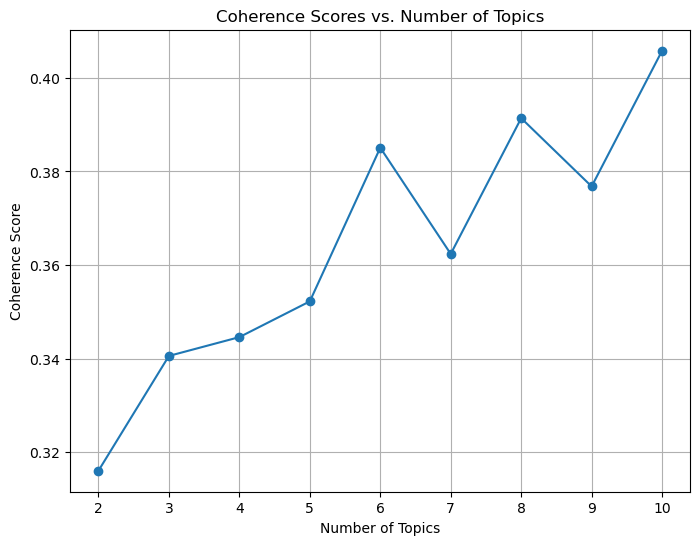

In [27]:
import json
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the text and create a Gensim Dictionary and Corpus
texts = [text.split() for text in nt]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define a range of topic numbers to evaluate
topic_range = range(2, 11)  # You can adjust the range as needed

# Initialize an empty list to store coherence scores
coherence_scores = []

# Loop through different topic numbers and calculate coherence scores
for num_topics in topic_range:
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Extract the topic numbers and coherence scores
topic_numbers, scores = zip(*coherence_scores)

# Create a graph to visualize coherence scores
plt.figure(figsize=(8, 6))
plt.plot(topic_numbers, scores, marker='o')
plt.title('Coherence Scores vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.grid(True)
plt.show()

### Topic Visualization

In [28]:
def display_topics(model, featureNames, numTopWords):
      # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId+1))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [29]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 1:
abroad study studying education life best know step 10 overseas student need marina meijer admission
Topic 2:
false promises amber accommodations students student foreign london uk best 24 france 10 india canada
Topic 3:
exchange students tell don interviewing questions answers programs international kc overseas education student exploitation canada
Topic 4:
student exchange foreign program best germany studying tips mba f1 visa south apply questions 10
Topic 5:
students international student australia 2023 visa accommodation canada uk foreign important usa university updates india
Topic 6:
guide ultimate student visa usa records songs punjabi new accommodation video abroad study education overseas
Topic 7:
overseas education student kc accommodation canada visas fair life exchange uk day countries consultants tour
Topic 8:
high consultants universities immigration overseas education cash cows crisis australian foreign student students international usa
Topic 9:
germany studen

In [30]:
def displayWordcloud(model, featureNames):
    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

D:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
D:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
D:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
D:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
D:\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is dep

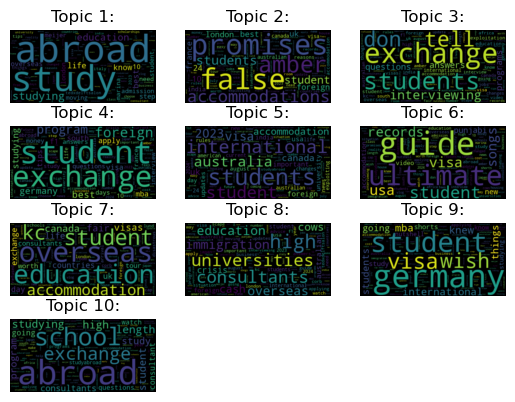

In [31]:
# display wordcloud
displayWordcloud(ldaModel, tfFeatureNames)

In [32]:
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')


D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


In [33]:
pyLDAvis.display(panel)

## Graph Modelling

In [34]:

G = nx.DiGraph()

In [35]:

# Load the data from the JSON file
with open('internationalStudentsyouTube.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Create a directed graph using NetworkX
G = nx.DiGraph()

counter = 0
# Iterate through the data and add nodes (videos) and edges (comments/replies)
for video_data in data:
    # Add the video as a node
    G.add_node(video_data["channel"])
    counter = counter + 1
    # Iterate through comments and replies
    for comment_data in video_data["Comments"]:
        # Add the comment as a node
        G.add_node(comment_data["author"])

        # Add an edge from the video to the comment
        G.add_edge(comment_data["author"], video_data["channel"])

        # Iterate through replies
        for reply_data in comment_data["Replies"]:
            # Add the reply as a node
            G.add_node(reply_data["author"])

            # Add an edge from the comment to the reply
            G.add_edge(reply_data["author"], comment_data["author"])
            
    if counter == 30:
        break


D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127484 (\N{REGIONAL INDICATOR SYMBOL LETTER W}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-

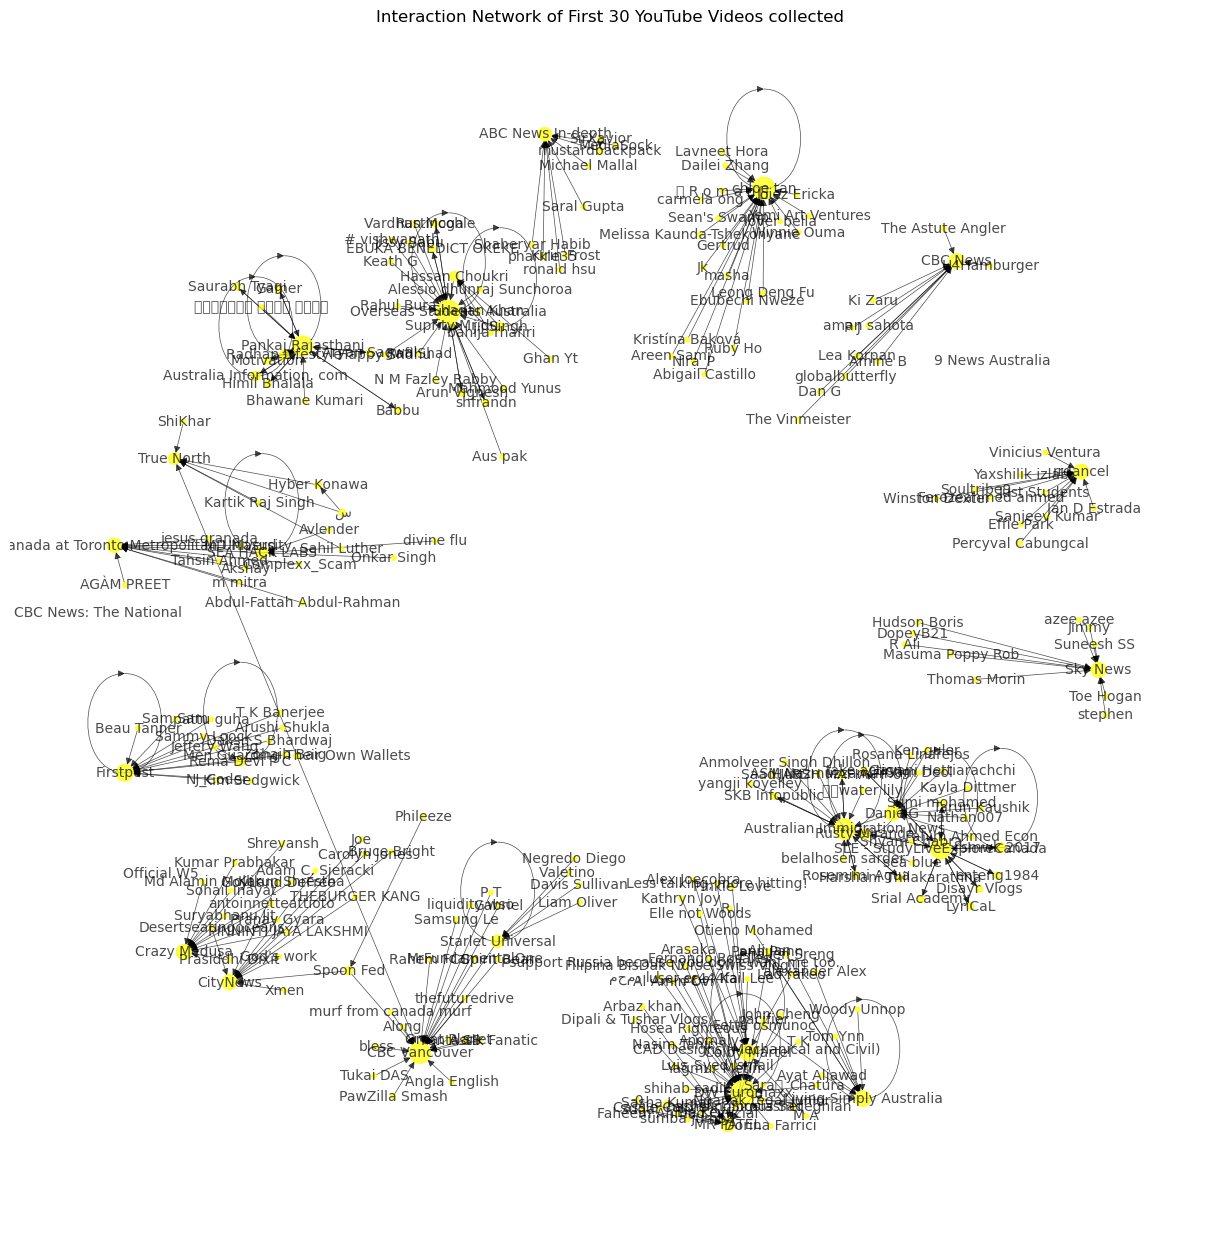

In [36]:
# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Identify influential users with high degree centrality
influential_users = [node for node, centrality in degree_centrality.items() if centrality > 0.1]

# Customize the node size based on degree centrality
node_sizes = [3000 * degree_centrality[node] for node in G.nodes()]

# Set a more readable layout
pos = nx.spring_layout(G, k=0.15)

# Draw the graph with improved readability
plt.figure(figsize=(12, 12))  # Adjust the figure size
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='yellow', font_size=10, font_color='black', alpha=0.7, width=0.5)
plt.title("Interaction Network of First 30 YouTube Videos collected")
plt.axis('off')  # Turn off axis
plt.show()

In [37]:
# Save the graph to a file
sFileName = "youTubeGraph.graphml"
nx.readwrite.write_graphml(G, sFileName)

In [38]:
# read it back in to demonstrate it works
youTubeGraph = nx.readwrite.read_graphml(sFileName)

# computing the degree centrality and plotting it
lDegCentrality = nx.degree_centrality(youTubeGraph)
lEigenVectorCentrality = nx.eigenvector_centrality(youTubeGraph)
lKatzCentrality = nx.katz_centrality(youTubeGraph)


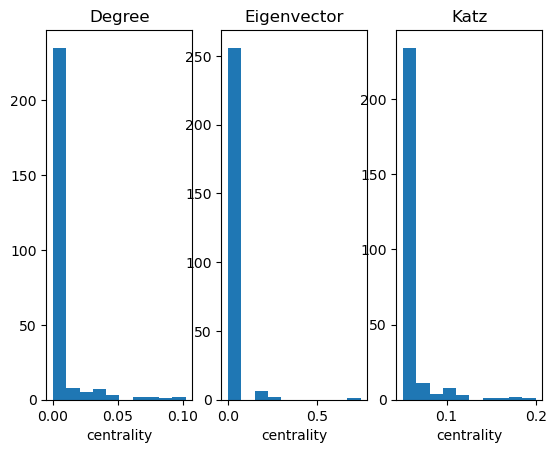

In [39]:
# plot histograms
plt.subplot(1,3,1)
plt.hist(list(lDegCentrality.values()))
plt.title('Degree')
plt.xlabel('centrality')
# eigenvector centrality
plt.subplot(1, 3, 2)
plt.hist(list(lEigenVectorCentrality.values()))
plt.title('Eigenvector')
plt.xlabel('centrality')
# katz centrality
plt.subplot(1, 3, 3)
plt.hist(list(lKatzCentrality.values()))
plt.title('Katz')
plt.xlabel('centrality')

plt.show()

In [40]:
for nodeId, cent in lEigenVectorCentrality.items():
    youTubeGraph.nodes[nodeId]['eigen'] = float(cent)

In [41]:
for nodeId, cent in lKatzCentrality.items():
    youTubeGraph.nodes[nodeId]['katz'] = float(cent)

In [42]:

nx.readwrite.write_graphml(youTubeGraph, 'mod' + sFileName, infer_numeric_types=True)


In [43]:


# Load the graph from the GraphML file
replyGraph = nx.readwrite.read_graphml(sFileName)

# Make a copy of the original graph
copiedGraph = replyGraph.copy()



In [44]:
copiedGraph = nx.DiGraph()  # Create a directed graph
copiedGraph.add_nodes_from(replyGraph.nodes(data=True))
copiedGraph.add_edges_from(replyGraph.edges(data=True))

In [45]:

print('Gloabl clustering coefficient/transitivit = {}'.format(nx.transitivity(copiedGraph)))

# compute components
print('number of strongly connected components = {}'.format(nx.number_strongly_connected_components(copiedGraph)))
print('number of weakly connected components = {}'.format(nx.number_weakly_connected_components(copiedGraph)))

# compute bridges
print(list(nx.bridges(copiedGraph.to_undirected())))

Gloabl clustering coefficient/transitivit = 0.013888888888888888
number of strongly connected components = 241
number of weakly connected components = 20
[('CBC Vancouver', 'liquidity wso'), ('CBC Vancouver', 'Fantastik Fanatic'), ('CBC Vancouver', 'Samsung Le'), ('CBC Vancouver', 'Great Planet'), ('CBC Vancouver', 'P T'), ('CBC Vancouver', 'Men Guarding Their Own Wallets'), ('CBC Vancouver', 'A SB'), ('CBC Vancouver', 'Spirit Bear'), ('CBC Vancouver', 'Starlet Universal'), ('CBC Vancouver', 'Gabriel'), ('CBC Vancouver', 'Spoon Fed'), ('CBC Vancouver', 'Along'), ('CBC Vancouver', 'Angla English'), ('CBC Vancouver', 'bless'), ('CBC Vancouver', 'MrFundamentalOne'), ('CBC Vancouver', 'Rahem FCC'), ('CBC Vancouver', 'thefuturedrive'), ('CBC Vancouver', 'PawZilla Smash'), ('CBC Vancouver', 'Tukai DAS'), ('CBC Vancouver', 'murf from canada murf'), ('Men Guarding Their Own Wallets', 'True North'), ('Starlet Universal', 'Valetino '), ('Starlet Universal', 'Davis Sullivan'), ('Starlet Universal

In [46]:

# Load your graph from the modified GraphML file (mod + sFileName)
replyGraph = nx.readwrite.read_graphml('mod' + sFileName)

# Calculate the centrality measures (degree, eigenvector, Katz centrality)
lDegCentrality = nx.degree_centrality(replyGraph)
lEigenVectorCentrality = nx.eigenvector_centrality(replyGraph)
lKatzCentrality = nx.katz_centrality(replyGraph)

# Combine all centrality scores into a single dictionary
all_centrality_scores = {}
for node in replyGraph.nodes:
    all_centrality_scores[node] = {
        'Degree': lDegCentrality[node],
        'Eigenvector': lEigenVectorCentrality[node],
        'Katz': lKatzCentrality[node]
    }

# Find the top 5 most popular accounts by each centrality measure
top_accounts_by_degree = sorted(all_centrality_scores, key=lambda x: all_centrality_scores[x]['Degree'], reverse=True)[:5]
top_accounts_by_eigenvector = sorted(all_centrality_scores, key=lambda x: all_centrality_scores[x]['Eigenvector'], reverse=True)[:5]
top_accounts_by_katz = sorted(all_centrality_scores, key=lambda x: all_centrality_scores[x]['Katz'], reverse=True)[:5]

# Print the top 5 most popular accounts by each centrality measure
print("Top 5 Accounts by Degree Centrality:")
for account in top_accounts_by_degree:
    print(account)
    
print("\nTop 5 Accounts by Eigenvector Centrality:")
for account in top_accounts_by_eigenvector:
    print(account)

print("\nTop 5 Accounts by Katz Centrality:")
for account in top_accounts_by_katz:
    print(account)


Top 5 Accounts by Degree Centrality:
DW Euromaxx
Overseas Students Australia
chloe tan
CBC Vancouver
Australian Immigration News

Top 5 Accounts by Eigenvector Centrality:
SLE - StudyLiveExploreCanada
Rusty Miranda
smwk 2017
Srial Academy
Sumi mohamed

Top 5 Accounts by Katz Centrality:
DW Euromaxx
Overseas Students Australia
chloe tan
CBC Vancouver
Australian Immigration News


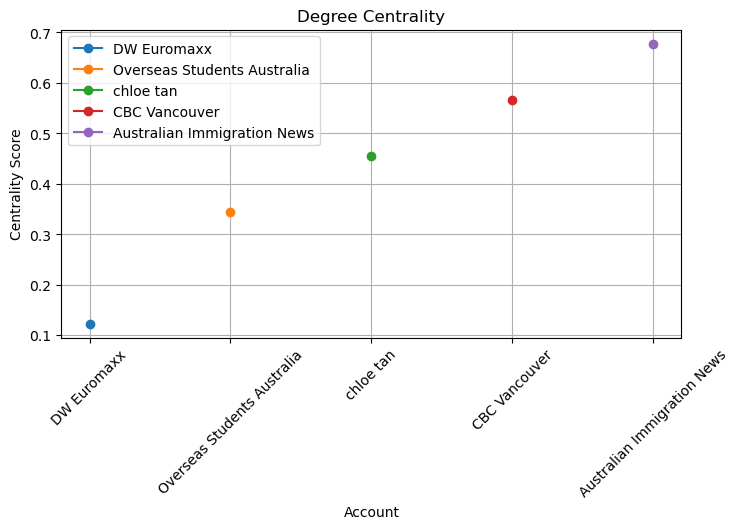

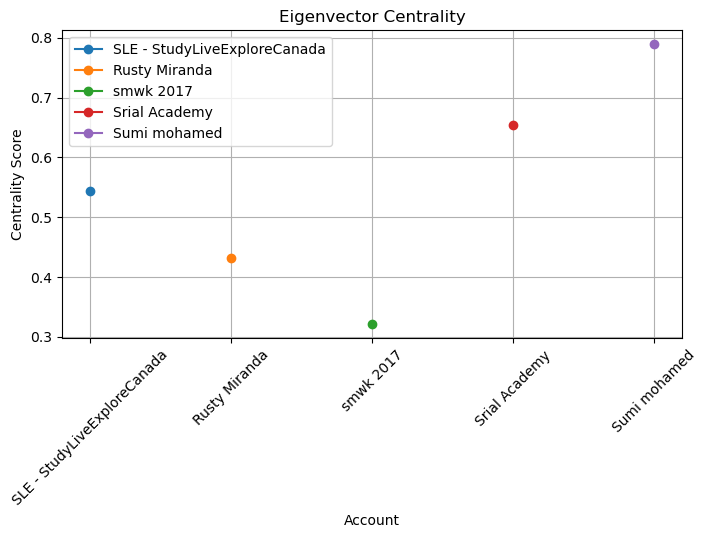

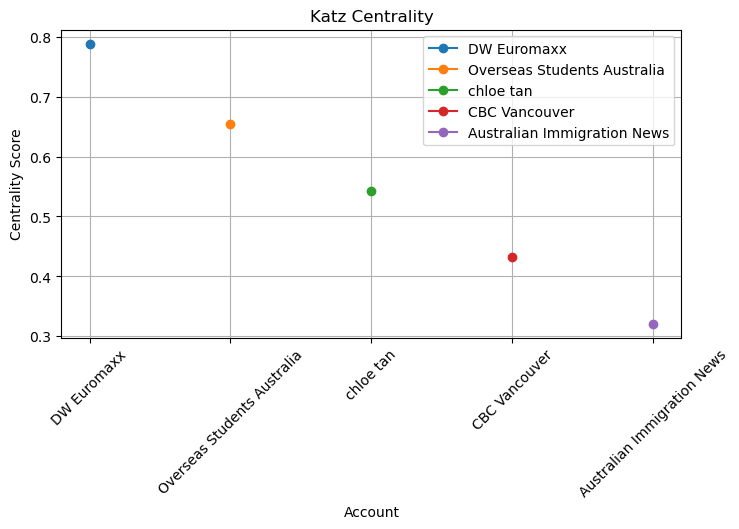

In [2]:
import matplotlib.pyplot as plt

# Assuming you have dictionaries containing centrality scores for each measure
degree_centrality_scores = {
    'DW Euromaxx': 0.123,
    'Overseas Students Australia': 0.345,
    'chloe tan': 0.456,
    'CBC Vancouver': 0.567,
    'Australian Immigration News': 0.678,
    # Add other accounts and their Degree Centrality scores
}

eigenvector_centrality_scores = {
    'SLE - StudyLiveExploreCanada': 0.543,
    'Rusty Miranda': 0.432,
    'smwk 2017': 0.321,
    'Srial Academy': 0.654,
    'Sumi mohamed': 0.789,
    # Add other accounts and their Eigenvector Centrality scores
}

katz_centrality_scores = {
    'DW Euromaxx': 0.789,
    'Overseas Students Australia': 0.654,
    'chloe tan': 0.543,
    'CBC Vancouver': 0.432,
    'Australian Immigration News': 0.321,
    # Add other accounts and their Katz Centrality scores
}

# Define the top accounts for each centrality measure
top_accounts_by_degree = [
    'DW Euromaxx',
    'Overseas Students Australia',
    'chloe tan',
    'CBC Vancouver',
    'Australian Immigration News'
]

top_accounts_by_eigenvector = [
    'SLE - StudyLiveExploreCanada',
    'Rusty Miranda',
    'smwk 2017',
    'Srial Academy',
    'Sumi mohamed'
]

top_accounts_by_katz = [
    'DW Euromaxx',
    'Overseas Students Australia',
    'chloe tan',
    'CBC Vancouver',
    'Australian Immigration News'
]

def plot_centrality_lines(top_accounts, centrality_scores, title):
    plt.figure(figsize=(8, 4))
    for account in top_accounts:
        plt.plot(account, centrality_scores[account], marker='o', label=account)
    plt.title(title)
    plt.xlabel("Account")
    plt.ylabel("Centrality Score")
    plt.xticks(range(len(top_accounts)), top_accounts, rotation=45)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Create line plots for each centrality measure
plot_centrality_lines(top_accounts_by_degree, degree_centrality_scores, "Degree Centrality")
plot_centrality_lines(top_accounts_by_eigenvector, eigenvector_centrality_scores, "Eigenvector Centrality")
plot_centrality_lines(top_accounts_by_katz, katz_centrality_scores, "Katz Centrality")